In [0]:
# 데이터는 https://drive.google.com/drive/folders/1CYxnxbI12D0hl6mzbyLiTdGtkpI2vosB?usp=sharing 에서 다운로드 받으실수있습니다. 

#[29-1] 워드 클라우드 분석

In [0]:
# 소주제: 요일별로 어떤 단어가 많이 트윗되었는지 알아보자. 

In [0]:
# 0. 환경 세팅

In [0]:
# !pip install matplotlib
# !pip install collections
# !pip install wordcloud
# !pip install pandas
# !pip install krwordrank

In [0]:
from matplotlib import rcParams
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pytagcloud
import random
import webbrowser

from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize

In [0]:
# 1. 데이터 전처리

In [0]:
train_data = pd.read_csv('/content/sample_data/sns_analysis/wordcloud.csv', encoding='latin-1', header=None)

In [0]:
train_data.columns = ['semantic', 'id', 'date', 'QUERY', 'p_id', 'text']

In [0]:
train_data['day'] = train_data['date'].apply(lambda x:x[0:3])

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
semantic    1600000 non-null int64
id          1600000 non-null int64
date        1600000 non-null object
QUERY       1600000 non-null object
p_id        1600000 non-null object
text        1600000 non-null object
day         1600000 non-null object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [0]:
day_list = train_data['day'].unique()
def article_per_day(day_list):
    total = dict()
    for i in day_list:
      label = str(i)
      print(label)
      target = pd.DataFrame(train_data.loc[train_data['day']==label])
      total[label] = target['text'].to_list()
      
    return total
      # article 돌면서 요일별로 분류

In [0]:
# 2. 워드클라우드 빈도에 따라 그리기 

In [0]:
def make_wordcloud(day): # ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
  total = article_per_day(day_list)
  text = ''

  for i in total['Tue']:
    text = text+i
  
  # nltk stopwords 
  stopwords = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}


  wordcloud = WordCloud(
      # font = font_path
      width = 800,
      height = 800
  )


  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texts)
  fig = plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()


Mon
Tue
Fri
Sat
Sun
Wed
Thu


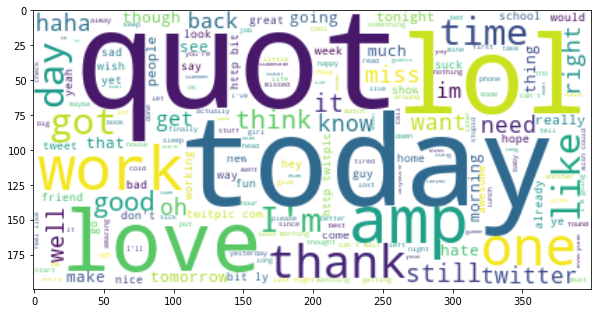

In [0]:
make_wordcloud('Wed')

# [29-2] 네트워크 분석

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from statistics import mean

# Draw the graph to screen
facebook_G = nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/자연어교재 실습/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [0]:
print(nx.info(facebook_G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [0]:
# degree of the centrality가 평균 이상인 노드들을 체크해보자. 

In [0]:
G = nx.algorithms.centrality.degree_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

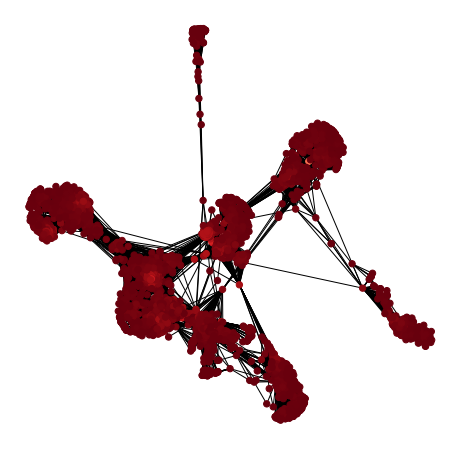

In [0]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


# nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
#                  node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [0]:
# eigenvector centrality가 평균 이상인 노드들을 체크해보자. 

In [0]:
G = nx.algorithms.centrality.eigenvector_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

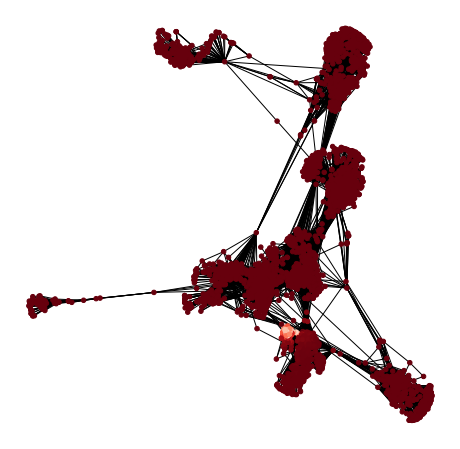

In [0]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


# nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
#                  node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [0]:
# closeness centrality가 평균 이상인 노드들을 체크해보자. 

In [0]:
G = nx.algorithms.centrality.closeness_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

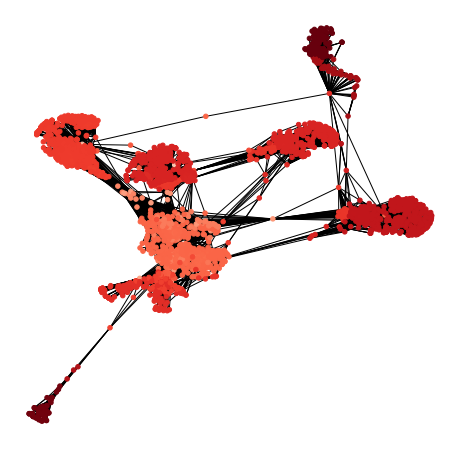

In [0]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


# nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
#                  node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [0]:
# closeness centrality가 평균 이상인 노드들을 체크해보자. 

In [0]:
G = nx.algorithms.centrality.betweenness_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

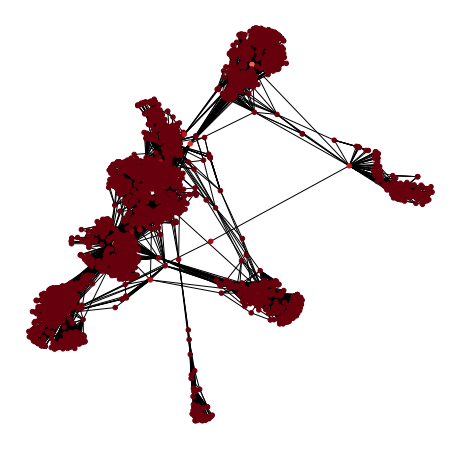

In [0]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


# nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
#                  node_size = 20, nodelist=G_overlist, node_color='#FF1744')



# [29-3] 딥러닝을 이용한 감성분석


###### 패키지 선언

In [0]:
# code
import json
import os
import nltk
import numpy as np


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

###### 파일은 \t을 기준으로 구성되어 있음.


In [0]:
def read_data(filename):
    with open(filename, 'r') as f:
      data = [line.split(',', 2 )[1:] for line in f.readlines()]
    return data

###### 토큰화 방법 

###### 토큰화 시켜서 데이터 재생성

In [0]:
def gen_data():
    train_data = read_data('/content/drive/My Drive/Colab Notebooks/자연어교재 실습/train_sentiment.csv')
    test_data = read_data('/content/drive/My Drive/Colab Notebooks/자연어교재 실습/test_sentiment.csv')
    train_data = train_data[1:]
    test_data =  test_data[1:]
    
    train_docs = [(row[1].split(' '), row[0]) for row in train_data]
    test_docs = [(row[1].split(' '), row[0]) for row in test_data]

    return train_data, test_data


In [0]:
train_data = read_data('/content/drive/My Drive/Colab Notebooks/자연어교재 실습/train_sentiment.csv')
test_data = read_data('/content/drive/My Drive/Colab Notebooks/자연어교재 실습/test_sentiment.csv')
train_data = train_data[1:]
test_data =  test_data[1:]

# train_docs = [(row[2].doc.split(' '), row[1]) for row in train_data]
# test_docs = [(row[2].doc.split(' '), row[1]) for row in test_data]

print(train_data[1])
print(test_data[1])

['0', "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!\n"]
['0', '"dear nike, stop with the flywire. that shit is a waste of science. and ugly. love, @vincentx24x"\n']


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
def count_token(train_docs):
    tokens = []
    print('train_docs', train_docs)
    for y in train_docs: # ['0','heelo, you know']
      tokens.extend([x for x in y[1].split(' ')])
    
    print("토큰수를 세기위한 샘플 토큰")
    print(tokens[0])
    print()
    text = nltk.Text(tokens)
    print(text, 'here')
    
    # 전체 토큰의 개수
    print("전체 토큰의 개수")
    print(len(text.tokens))
    print()
    # 중복을 제외한 토큰의 개수
    print("중복을 제외한 토큰의 개수")
    print(len([x for x in text.tokens]))
    print(text, 'herrrrrrrrrrrrrrrrrrrrrrrr')
    # 출현 빈도가 높은 상위 토큰 10개
    print("출현 빈도가 높은 상위 토큰 10개")
    print(text.vocab().most_common(10))
    print()
    return text

###### 모델선언
###### CountVectorization을 사용하여 데이터를 벡터화
###### 문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 Bag Of Words 인코딩 방식으로 벡터를 표현

In [0]:
def term_frequency(doc, selected_words):
    return [doc.count(word) for word in selected_words]


def set_input(text, train_docs, test_docs):
    
    selected_words = [f[0] for f in text.vocab().most_common(100)]
    print(selected_words)
    # d, _
    train_x = [term_frequency(d, selected_words) for _, d in train_docs]
    test_x = [term_frequency(d, selected_words) for _, d in test_docs]
    train_y = [c for c, _ in train_docs]
    test_y = [c for c, _ in test_docs]

    
    # data 형 변환
    x_train = np.asarray(train_x).astype('float32')
    x_test = np.asarray(test_x).astype('float32')
    y_train = np.asarray(train_y).astype('float32')
    y_test = np.asarray(test_y).astype('float32')
    return selected_words, x_train, x_test, y_train, y_test


def set_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(100,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

    

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### 학습

In [0]:
def train_model(model, x_train, y_train):
    print("\n training part")
    model.fit(x_train, y_train, epochs=10, batch_size=32)
    return model

###### 평가

In [0]:
def eval_model(model, x_test, y_test):
    print("\n evaluation part")
    results = model.evaluate(x_test, y_test)
    print(results)

###### 메인함수

In [0]:
if __name__ == '__main__':

    
    train_docs, test_docs = gen_data()
    # 학습데이터 샘플
    print(train_docs[0])
    
    text = count_token(train_docs)
    selected_words, x_train, x_test, y_train, y_test = set_input(text, train_docs, test_docs)
    
    model = set_model()

    # 입력데이터 표현
    # x_train, y_train
    print("입력데이터 표현")
    print(x_train[0])
    print(y_train[0])
    print()

    model = train_model(model, x_train, y_train)
    eval_model(model, x_test, y_test)

['0', '"@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"\n']
train_docs 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



토큰수를 세기위한 샘플 토큰
"@switchfoot

<Text: "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. ...> here
전체 토큰의 개수
23011409

중복을 제외한 토큰의 개수
23011409
<Text: "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. ...> herrrrrrrrrrrrrrrrrrrrrrrr
출현 빈도가 높은 상위 토큰 10개
[('\n', 911273), ('', 752262), ('to', 552763), ('the', 486945), ('I', 485288), ('a', 365995), ('my', 278826), ('and', 274924), ('"\n', 266017), ('i', 246187)]

['\n', '', 'to', 'the', 'I', 'a', 'my', 'and', '"\n', 'i', 'is', 'you', 'for', 'in', 'of', 'it', 'on', 'have', 'so', 'me', 'that', 'with', 'be', 'but', 'at', 'was', "I'm", 'just', 'not', 'this', 'get', 'like', 'are', 'up', 'all', '-', 'out', 'go', 'your', 'good', 'day', 'do', 'from', 'got', 'now', 'going', 'love', 'no', 'about', 'will', 'work', 'back', 'u', "it's", 'some', 'am', "don't", 'can', 'really', 'see', 'know', 'had', 'one', '&amp;', 'too', 'we', 'want', 'time', 'what', 'think', 'im', 'as', "can't", 'new', 'when', 'its', 'still', '2', 'if', 'an', 'mi